In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read in the training data frame
df = pd.read_csv('train.csv')

In [3]:
df.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,0
2,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,NaN,NaN,My students need the 3doodler. We are an SEM s...,5,1
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,My students need balls and other activity equi...,16,0
4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,NaN,NaN,My students need a water filtration system for...,42,1


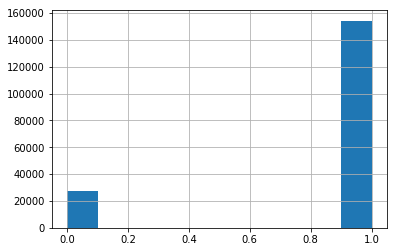

In [4]:
labels = df.project_is_approved
labels.hist()

In [5]:
not_approved = df[df['project_is_approved'] == 0]
approved = df[df['project_is_approved'] == 1]
pct_approved = len(approved) / len(df) * 100
print("total number of projects: {}".format(len(df)))
print("# of projects not approved: {}".format(len(not_approved)))
print("# of projects approved: {}".format(len(approved)))
print("Project Approval Rate: {0:.2f}%".format(pct_approved))

total number of projects: 182080
# of projects not approved: 27734
# of projects approved: 154346
Project Approval Rate: 84.77%


In [6]:
# Check for missing values
df.isna().sum()

id                                                   0
teacher_id                                           0
teacher_prefix                                       4
school_state                                         0
project_submitted_datetime                           0
project_grade_category                               0
project_subject_categories                           0
project_subject_subcategories                        0
project_title                                        0
project_essay_1                                      0
project_essay_2                                      0
project_essay_3                                 175706
project_essay_4                                 175706
project_resource_summary                             0
teacher_number_of_previously_posted_projects         0
project_is_approved                                  0
dtype: int64

In [8]:
# remove columns because of the number of missing values
cols_to_drop = ['project_title', 'project_essay_1', 'project_essay_2', 'project_resource_summary', 'project_submitted_datetime',
               "id", "project_essay_3", "project_essay_4", "project_is_approved"]
df.drop(cols_to_drop, axis=1, inplace=True)
df.isna().sum()

teacher_id                                      0
teacher_prefix                                  4
school_state                                    0
project_grade_category                          0
project_subject_categories                      0
project_subject_subcategories                   0
teacher_number_of_previously_posted_projects    0
dtype: int64

In [ ]:
# check for multiple occurences of the same teacher
repeat_teacher = df[df["teacher_id"] == df.iloc[0]["teacher_id"]]
repeat_teacher

In [ ]:
for col in df.columns:
    print("-" * 40)
    print("column name: {}".format(col))
    print("# of unique values: {}".format(len(df[col].unique())))

In [ ]:
from sklearn.metrics import f1_score


clf = RandomForestClassifier()
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
f1_score(y_test, preds)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

df.drop(cols_to_drop, axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(df, labels)